# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

# Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 1. Importing Library

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing RFE and LinearRegression and Scaling
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#importing train_test_split and MinMaxScalar library
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

from sklearn.feature_selection import RFE

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# 2.Read and understand the data 

In [2]:
#Load the housing predictions data into dataframe
housing = pd.read_csv('train.csv')

In [3]:
#Shape of the dataset
housing.shape

(1460, 81)

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#checking the summary
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Analysis:
    1. 'SalePrice' is the target variable.
    2. Total 1460 rows ans 81 columns are present in the dataset

# 3. Data Cleaning

In [7]:
# checking null values in the dataset
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Some of the columns has NA values which is not NULL values, we need to impute the below values

In [8]:
# In Alley - Filling NA values as No Alley
housing.Alley.fillna('No Alley',inplace=True)

In [9]:
# In Basement - Filling NA values as No Basement
housing.BsmtQual.fillna('No Basement',inplace=True)
housing.BsmtCond.fillna('No Basement',inplace=True)
housing.BsmtExposure.fillna('No Basement',inplace=True)
housing.BsmtFinType1.fillna('No Basement',inplace=True)
housing.BsmtFinType2.fillna('No Basement',inplace=True)

In [10]:
# In Fireplace - Filling NA value as No Fire
housing.FireplaceQu.fillna('No Fire',inplace=True)

In [11]:
#In Garage,Pool, Fence - Filling NA values as No garage, No Pool, No Fence and None
housing.GarageType.fillna('No Garage',inplace=True)
housing.GarageFinish.fillna('No Garage',inplace=True)
housing.GarageQual.fillna('No Garage',inplace=True)
housing.GarageCond.fillna('No Garage',inplace=True)
housing.PoolQC.fillna('No Pool',inplace=True)
housing.Fence.fillna('No Fence',inplace=True)
housing.MiscFeature.fillna('None',inplace=True)

In [12]:
# Filling NA as 0 in GarageYr Blt
housing.GarageYrBlt.fillna(0,inplace=True)
housing.MasVnrType.fillna('None',inplace=True)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

These LotFrontage,MasVnrArea,Electrical columns have null values, need to impute Mean and mode values. 

In [14]:
#Imputing mean to Lot Frontage NA values 
housing.LotFrontage=housing.LotFrontage.fillna(housing.LotFrontage.mean())

In [15]:
#Imputing mean to MasVnrArea NA values
housing.MasVnrArea=housing.MasVnrArea.fillna(housing['MasVnrArea'].mean())

In [16]:
#Imputing Mode to Electrical NA value
housing.Electrical=housing.Electrical.replace(np.nan, housing['Electrical'].mode()[0])

In [17]:
#To display all the columns 
pd.set_option('display.max_columns', 500)

# Derived New Columns

In [18]:
# Creating Year bulit age column from YearBuilt
housing['YearBuilt_old'] = 2022-housing['YearBuilt']

In [19]:
# Creating YearRemodAdd age column from YearRemodAdd
housing['YearRemodAdd_old'] = 2022- housing['YearRemodAdd']

In [20]:
# Creating Year bulit age column from YrSold
housing['YrSold_old'] = 2022-housing['YrSold']

In [21]:
# Creating Year bulit age column from YearBuilt
housing['GarageYrBlt_old'] = 2022-housing['GarageYrBlt']

In [22]:
# Converting Integer type
housing['GarageYrBlt_old'] = housing['GarageYrBlt_old'].astype('int64')

In [23]:
# Replacing 2022 as 0
housing['GarageYrBlt_old'] = housing['GarageYrBlt_old'].replace(2022,0)

# Converting Datatypes

In [24]:
# Converting data types to object for categorical varaibles
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')
housing['MoSold'] = housing['MoSold'].astype('object')


In [25]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fire,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,19,19,14,19
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,46,46,15,46
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,21,20,14,21
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,107,52,16,24
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,22,22,14,22


In [26]:
housing.shape

(1460, 85)

# Dropping the variables

In [27]:
housing = housing.drop(['Id','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','MoSold'],axis=1)

## Drop the following columns that have more than 85% values associated to a specific value
1241/1460 =85% 

In [28]:
#Checking all datatypes and removing the specific values which is greater than 85%
def removeHighCategoricalnumericalValueCounts():
    column = []
    categorical_columns = housing.select_dtypes(include=['object','int64', 'float'])
    for col in (categorical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = removeHighCategoricalnumericalValueCounts()

# Remove the columns 

housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fire,Attchd,RFn,2,548,0,61,No Fence,Normal,208500,19,19,14,19
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,No Fence,Normal,181500,46,46,15,46
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,No Fence,Normal,223500,21,20,14,21
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,No Fence,Abnorml,140000,107,52,16,24
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,No Fence,Normal,250000,22,22,14,22


In [29]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   int64  
 10  OverallCond       1460 non-null   int64  
 11  RoofStyle         1460 non-null   object 
 12  Exterior1st       1460 non-null   object 
 13  Exterior2nd       1460 non-null   object 
 14  MasVnrType        1460 non-null   object 
 15  MasVnrArea        1460 non-null   float64
 16  ExterQual         1460 non-null   object 


After removing the specific values in the columns, Total columns is reduced to 49. 

In [30]:
# After removing specific values in the columns and the shape of the dataframe.
housing.shape

(1460, 49)

# Plot the Target Variable - SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

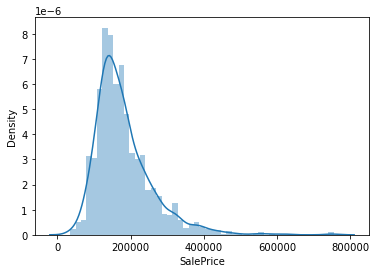

In [31]:
# Plotting Sale price
sns.distplot(housing.SalePrice)

It is Right Skewed data.So, need to use Log transformation. 

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

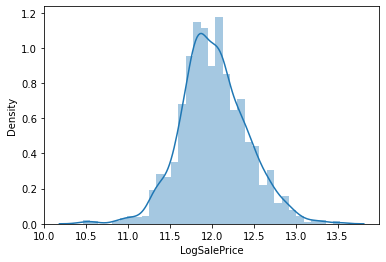

In [32]:
# Log transformation 
housing['LogSalePrice'] = np.log(housing['SalePrice'])
sns.distplot(housing.LogSalePrice)

In [33]:
# Dropping the skewed sale price column
housing = housing.drop('SalePrice',axis=1)

In [34]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice
0,65.000000,8450,7,5,196.0,706,150,856,856,854,1710,8,548,0,61,19,19,14,19,12.247694
1,80.000000,9600,6,8,0.0,978,284,1262,1262,0,1262,6,460,298,0,46,46,15,46,12.109011
2,68.000000,11250,7,5,162.0,486,434,920,920,866,1786,6,608,0,42,21,20,14,21,12.317167
3,60.000000,9550,7,5,0.0,216,540,756,961,756,1717,7,642,0,35,107,52,16,24,11.849398
4,84.000000,14260,8,5,350.0,655,490,1145,1145,1053,2198,9,836,192,84,22,22,14,22,12.429216
5,85.000000,14115,5,5,0.0,732,64,796,796,566,1362,5,480,40,30,29,27,13,29,11.870600
6,75.000000,10084,8,5,186.0,1369,317,1686,1694,0,1694,7,636,255,57,18,17,15,18,12.634603
7,70.049958,10382,7,6,240.0,859,216,1107,1107,983,2090,7,484,235,204,49,49,13,49,12.206073
8,51.000000,6120,7,5,0.0,0,952,952,1022,752,1774,8,468,90,0,91,72,14,91,11.774520
9,50.000000,7420,5,6,0.0,851,140,991,1077,0,1077,5,205,0,4,83,72,14,83,11.678440


In [35]:
# Numeric datatypes shape
housing_numeric.shape

(1460, 20)

# Pairplots for Numerical variables

<Figure size 720x360 with 0 Axes>

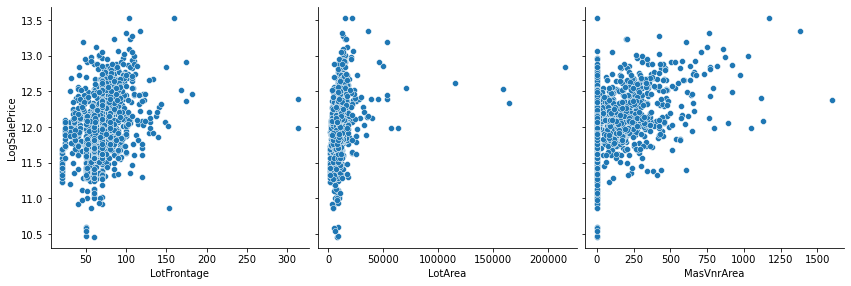

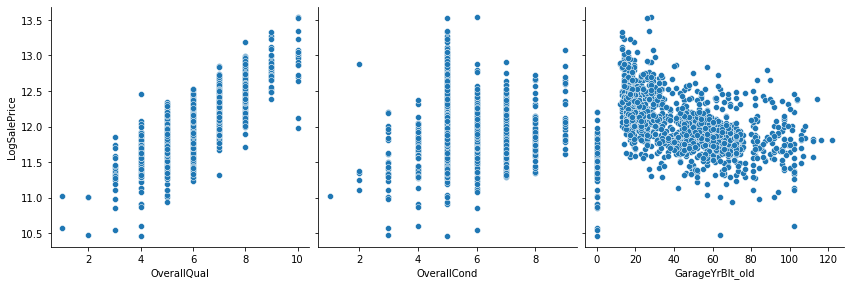

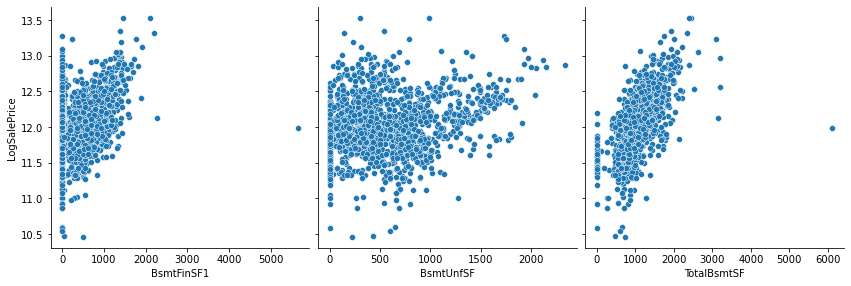

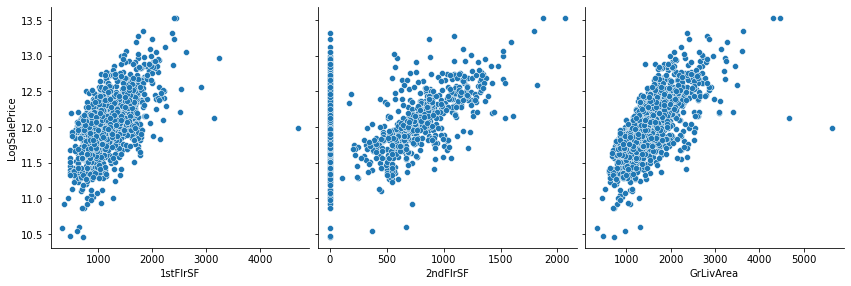

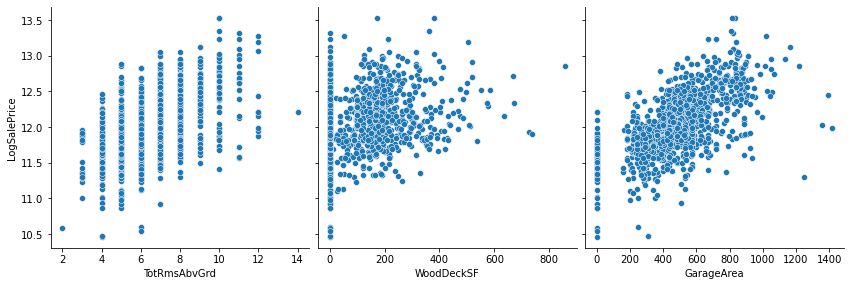

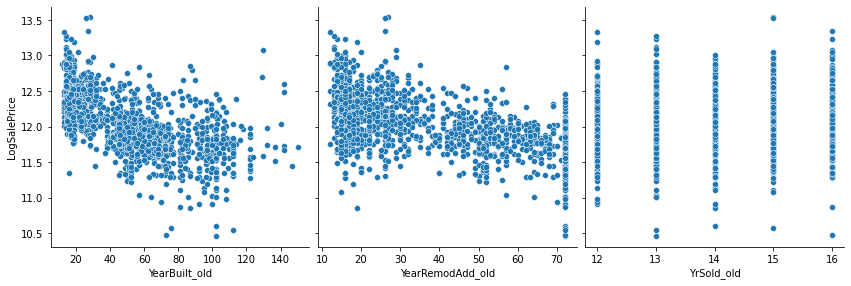

In [36]:
# Check the numerical values using pairplots
plt.figure(figsize=(10,5))
sns.pairplot(housing, x_vars=['LotFrontage','LotArea','MasVnrArea'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond','GarageYrBlt_old'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['TotRmsAbvGrd', 'WoodDeckSF','GarageArea',], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['YearBuilt_old','YearRemodAdd_old','YrSold_old'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')

plt.show()

From the plot, we can clearly see the outliers are present and some are linearly dependent to each other.

# Checking the Outliers for  Numeric columns

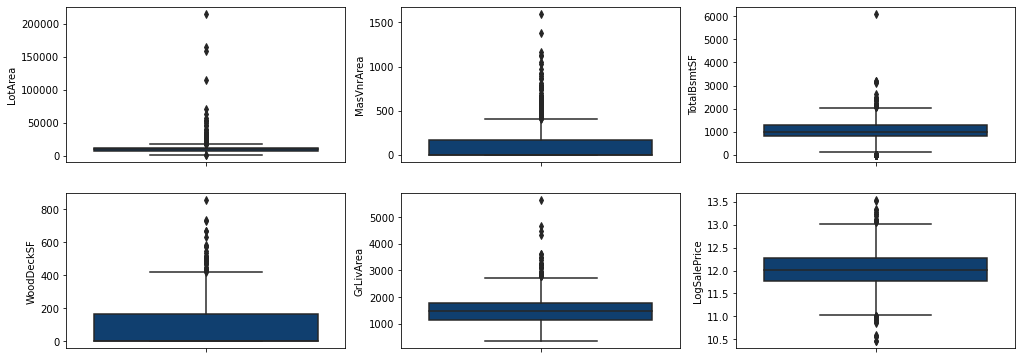

In [37]:
# Check the outliers in the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(6,3,1)
sns.boxplot(y = 'LotArea', palette="ocean_r", data =housing)
plt.subplot(6,3,2)
sns.boxplot(y = 'MasVnrArea',palette="ocean_r", data =housing)
plt.subplot(6,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette="ocean_r", data =housing)
plt.subplot(6,3,4)
sns.boxplot(y = 'WoodDeckSF',palette="ocean_r", data =housing)
plt.subplot(6,3,5)
sns.boxplot(y = 'GrLivArea',palette="ocean_r", data =housing)
plt.subplot(6,3,6)
sns.boxplot(y = 'LogSalePrice',palette="ocean_r", data =housing)
plt.show()

From the Boxplot, we can see the outliers present in the LotArea and other variables

In [38]:
# Looking 25th,50th,75th,90th percentile for the numerical variables
housing_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,6.517808,472.980137,94.244521,46.660274,50.732192,37.134247,14.184247,41.080822,12.024051
std,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,1.625393,213.804841,125.338794,66.256028,30.202904,20.645407,1.328095,25.979541,0.399452
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,12.000000,0.000000,10.460242
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,22.000000,18.000000,13.000000,19.000000,11.775097
50%,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,49.000000,28.000000,14.000000,37.500000,12.001505
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,68.000000,55.000000,15.000000,60.000000,12.273731
90%,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,9.000000,757.100000,262.000000,130.000000,97.100000,72.000000,16.000000,74.000000,12.535376
95%,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,10.000000,850.100000,335.000000,175.050000,106.000000,72.000000,16.000000,92.000000,12.694958
99%,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,11.000000,1002.790000,505.460000,285.820000,122.820000,72.000000,16.000000,104.820000,13.000323


After looking into the variables, outliers are present in the dataset. we need to remove it

# Removing Outliers

## Removing Lower and Upper Quantile as 0.25 and 0.95 respectively

In [39]:
# Removing outliers for the numerical data
num_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF',
           'GarageArea']
def remove_outliers(x):
    
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing = remove_outliers(housing)

In [40]:
housing.shape

(1424, 49)

In [41]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.00000,1424.000000,1424.000000,1424.000000,1424.000000
mean,69.249606,9612.952247,6.076545,5.578652,97.937357,426.098315,568.537921,1040.110253,1146.829354,341.583567,1494.129916,6.487360,468.245084,91.455758,44.957865,50.68750,37.169242,14.178371,40.965590,12.012876
std,19.178193,3828.287739,1.362755,1.111238,163.916721,423.101424,441.506507,400.954110,359.961460,427.319799,485.212367,1.600635,210.182157,120.986352,61.450284,30.21904,20.686602,1.331465,25.975627,0.389023
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,12.00000,12.000000,12.000000,0.000000,10.471950
25%,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,223.750000,793.000000,876.750000,0.000000,1125.000000,5.000000,321.500000,0.000000,0.000000,21.00000,18.000000,13.000000,18.750000,11.770469
50%,70.049958,9375.000000,6.000000,5.000000,0.000000,371.000000,482.500000,982.500000,1078.500000,0.000000,1452.500000,6.000000,474.500000,0.000000,24.000000,49.00000,28.000000,14.000000,37.000000,11.986669
75%,78.250000,11405.250000,7.000000,6.000000,160.250000,697.000000,808.000000,1271.250000,1368.500000,728.000000,1766.250000,7.000000,576.000000,168.000000,66.000000,68.00000,55.000000,15.000000,60.000000,12.254863
90%,91.000000,13891.000000,8.000000,7.000000,319.400000,1029.600000,1232.000000,1581.700000,1659.700000,931.400000,2126.700000,8.000000,747.400000,253.000000,128.000000,97.00000,72.000000,16.000000,74.000000,12.524494
95%,101.000000,16190.300000,8.000000,8.000000,434.550000,1244.800000,1466.650000,1728.000000,1795.000000,1120.850000,2401.400000,9.000000,840.000000,324.000000,169.000000,106.00000,72.000000,16.000000,92.000000,12.676076
99%,127.080000,21916.660000,9.000000,9.000000,744.090000,1516.850000,1790.860000,2076.770000,2127.160000,1355.160000,2871.080000,11.000000,968.000000,483.700000,264.310000,122.00000,72.000000,16.000000,103.540000,12.961584


After Removing outliers to the numeric columns

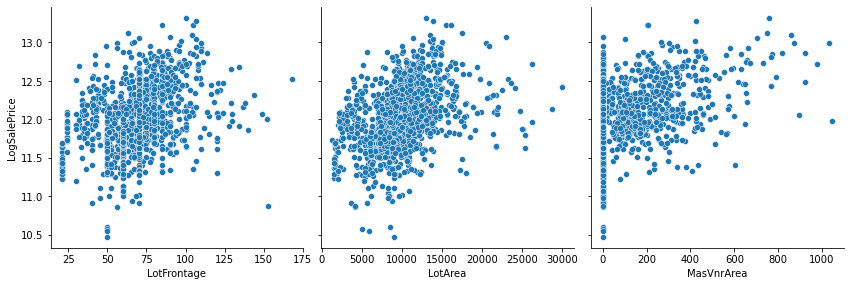

In [42]:
sns.pairplot(housing, x_vars=['LotFrontage','LotArea','MasVnrArea'], y_vars='LogSalePrice',height=4, aspect=1,kind='scatter')

# Heatmap Correlation

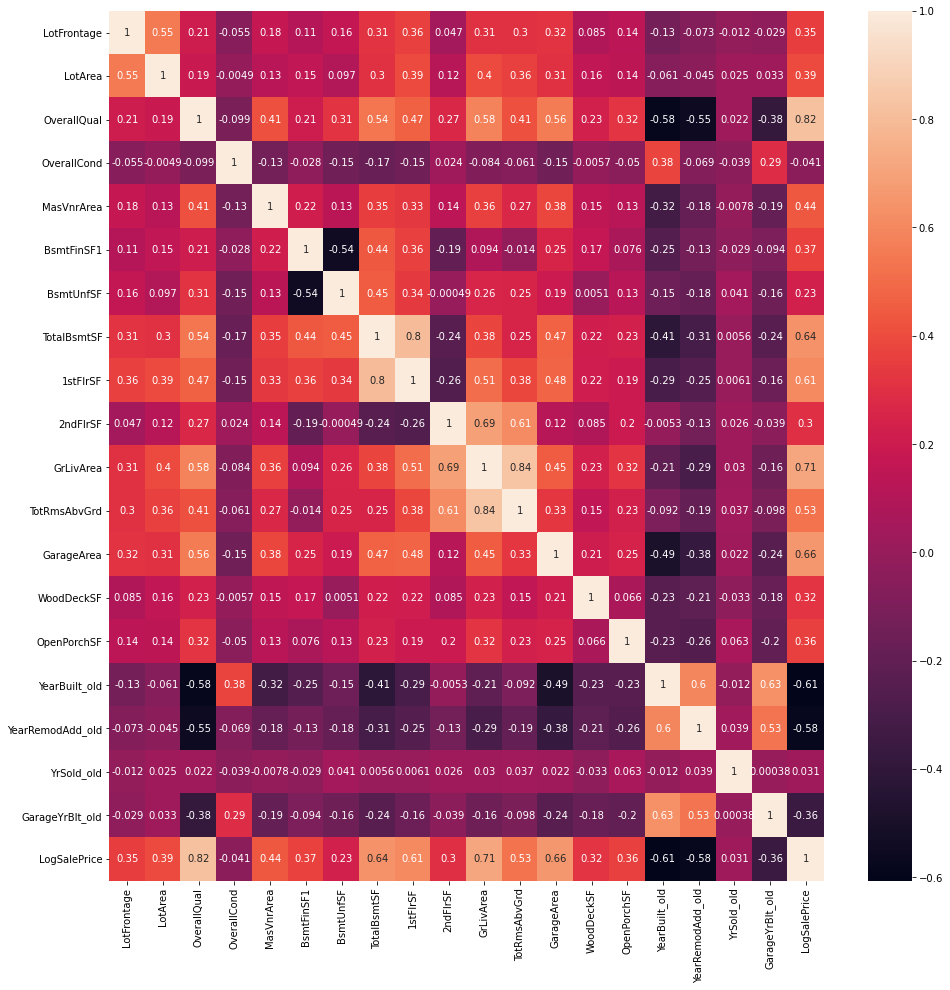

In [43]:
plt.figure(figsize=(16,16))
sns.heatmap(housing.corr(),annot=True)
plt.show()

1. LogSalePrice is high correlation with OverallQual(0.82)
2. LogsalePrice is high correlation with GrLivArea(0.71)
3. Year_Bulid_old is negative correlation with Garage Area(-0.49)
4. Year_Bulid_old is negative correction with LogSalePrice(-0.61)

# Box Plot for Categorical and Numerical(SalePrice) variables

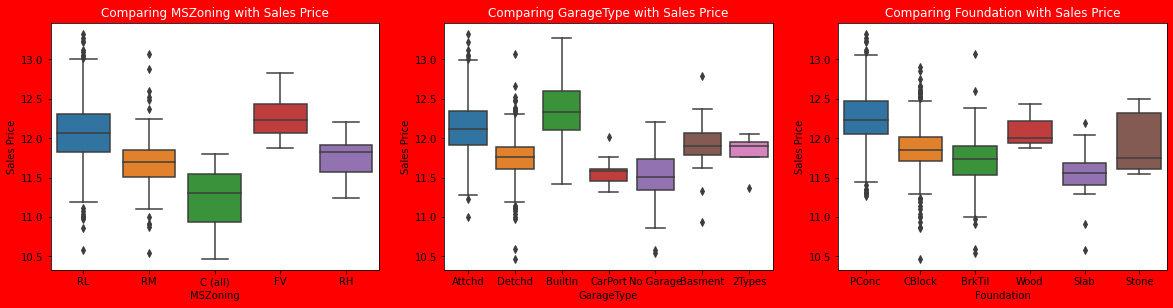

In [44]:
#Assigning figure size
plt.figure(figsize=(20,10),facecolor='r')
# subplot 1
plt.subplot(2,3,1)
sns.boxplot(x='MSZoning', y='LogSalePrice', data=housing)
plt.title('Comparing MSZoning with Sales Price',color='w')
plt.xlabel('MSZoning')
plt.ylabel('Sales Price')
# subplot 2
plt.subplot(2,3,2)
sns.boxplot(x='GarageType', y='LogSalePrice', data=housing)
plt.title('Comparing GarageType with Sales Price',color='w')
plt.xlabel('GarageType')
plt.ylabel('Sales Price')

# subplot 3
plt.subplot(2,3,3)
sns.boxplot(x='Foundation', y='LogSalePrice', data=housing)
plt.title('Comparing Foundation with Sales Price',color='w')
plt.xlabel('Foundation')
plt.ylabel('Sales Price')
plt.show()


1. In Garage Type, 75th percentile for Builtin is higher comapred to other garage types.
2. In Foundataion, 75th percentile for PConc is higher compared to other foundations.
3. In MS Zoning, 75th percentile for FV is higher.

# After Removing Outliers in the Numerical varialbes

In [45]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice
0,65.000000,8450,7,5,196.0,706,150,856,856,854,1710,8,548,0,61,19,19,14,19,12.247694
1,80.000000,9600,6,8,0.0,978,284,1262,1262,0,1262,6,460,298,0,46,46,15,46,12.109011
2,68.000000,11250,7,5,162.0,486,434,920,920,866,1786,6,608,0,42,21,20,14,21,12.317167
3,60.000000,9550,7,5,0.0,216,540,756,961,756,1717,7,642,0,35,107,52,16,24,11.849398
4,84.000000,14260,8,5,350.0,655,490,1145,1145,1053,2198,9,836,192,84,22,22,14,22,12.429216
5,85.000000,14115,5,5,0.0,732,64,796,796,566,1362,5,480,40,30,29,27,13,29,11.870600
6,75.000000,10084,8,5,186.0,1369,317,1686,1694,0,1694,7,636,255,57,18,17,15,18,12.634603
7,70.049958,10382,7,6,240.0,859,216,1107,1107,983,2090,7,484,235,204,49,49,13,49,12.206073
8,51.000000,6120,7,5,0.0,0,952,952,1022,752,1774,8,468,90,0,91,72,14,91,11.774520
9,50.000000,7420,5,6,0.0,851,140,991,1077,0,1077,5,205,0,4,83,72,14,83,11.678440


In [46]:
housing_numeric.shape

(1424, 20)

# Categorical variables

In [47]:
# all Object variables in the dataset
housing_cate = housing.select_dtypes(include=['object'])
housing_cate.head(10)


,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,Fence,SaleCondition
0,60,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,0,No Fire,Attchd,RFn,2,No Fence,Normal
1,20,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,1,TA,Attchd,RFn,2,No Fence,Normal
2,60,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,1,TA,Attchd,RFn,2,No Fence,Normal
3,70,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,No Fence,Abnorml
4,60,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,1,TA,Attchd,RFn,3,No Fence,Normal
5,50,RL,IR1,Inside,Mitchel,1Fam,1.5Fin,Gable,VinylSd,VinylSd,None,TA,Wood,Gd,No,GLQ,Ex,1,1,1,1,TA,0,No Fire,Attchd,Unf,2,MnPrv,Normal
6,20,RL,Reg,Inside,Somerst,1Fam,1Story,Gable,VinylSd,VinylSd,Stone,Gd,PConc,Ex,Av,GLQ,Ex,1,2,0,3,Gd,1,Gd,Attchd,RFn,2,No Fence,Normal
7,60,RL,IR1,Corner,NWAmes,1Fam,2Story,Gable,HdBoard,HdBoard,Stone,TA,CBlock,Gd,Mn,ALQ,Ex,1,2,1,3,TA,2,TA,Attchd,RFn,2,No Fence,Normal
8,50,RM,Reg,Inside,OldTown,1Fam,1.5Fin,Gable,BrkFace,Wd Shng,None,TA,BrkTil,TA,No,Unf,Gd,0,2,0,2,TA,2,TA,Detchd,Unf,2,No Fence,Abnorml
9,190,RL,Reg,Corner,BrkSide,2fmCon,1.5Unf,Gable,MetalSd,MetalSd,None,TA,BrkTil,TA,No,GLQ,Ex,1,1,0,2,TA,2,TA,Attchd,RFn,1,No Fence,Normal


# Creating Dummies for the categorical data

In [48]:
#Creating dummies for categorical variables
housing_dum = pd.get_dummies(housing_cate,drop_first=True)

In [49]:
#shape of the dummy variables
housing_dum.shape

(1424, 171)

In [50]:
housing_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [51]:
# Creating Final model
housing_final = pd.concat([housing_numeric,housing_dum],axis='columns')

In [52]:
housing_final.shape

(1424, 191)

# Spliting Train and Test data

In [53]:
# Spliting the dataset 
df_train, df_test = train_test_split(housing_final, train_size = 0.7, test_size = 0.3, random_state = 38)

In [54]:
#shape after the split the dataset
print(df_train.shape)
print(df_test.shape)

(996, 191)
(428, 191)


In [55]:
# Creating numeric columns expect target variables
sca = housing_numeric.columns.drop('LogSalePrice')

In [56]:
sca.shape

(19,)

In [57]:
# Apply MinMaxscaler() to all the columns 

scaler = MinMaxScaler()

df_train[sca] = scaler.fit_transform(df_train[sca])

df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.409091,0.322104,0.444444,0.500,0.000000,0.000000,0.000000,0.000000,0.377535,0.237624,0.443178,0.6,0.387770,0.000000,0.000000,0.239130,0.550000,0.25,0.387931,11.744037,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
794,0.371591,0.347909,0.666667,0.500,0.000000,0.000000,0.304795,0.270414,0.293292,0.444994,0.494144,0.5,0.294245,0.194293,0.110048,0.115942,0.233333,0.50,0.241379,12.178187,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [58]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,LogSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.00000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.00000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.0

In [59]:
# y_train will be target varaible and X_train will be independent variables
y_train = df_train.pop('LogSalePrice')
X_train = df_train

# Model Buliding And Model Evaluation

# Linear Regression with RFE

In [60]:
# Linear regression model using sklearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Reducing the number of features to 50 using automated approach
rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 43),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 49),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 39),
 ('2ndFlrSF', False, 101),
 ('GrLivArea', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('GarageArea', False, 61),
 ('WoodDeckSF', False, 16),
 ('OpenPorchSF', True, 1),
 ('YearBuilt_old', True, 1),
 ('YearRemodAdd_old', False, 62),
 ('YrSold_old', False, 79),
 ('GarageYrBlt_old', True, 1),
 ('MSSubClass_30', False, 133),
 ('MSSubClass_40', False, 111),
 ('MSSubClass_45', False, 26),
 ('MSSubClass_50', False, 3),
 ('MSSubClass_60', False, 89),
 ('MSSubClass_70', False, 2),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 121),
 ('MSSubClass_85', False, 54),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 45),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 48),
 ('MSSubClass_190', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', 

In [62]:
#columns selected by RFE
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'TotRmsAbvGrd', 'OpenPorchSF', 'YearBuilt_old',
       'GarageYrBlt_old', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'BldgType_2fmCon', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_Other', 'Foundation_Wood',
       'BsmtQual_No Basement', 'BsmtFinType1_No Basement', 'HeatingQC_Po',
       'BsmtFullBath_3', 'BedroomAbvGr_5', 'Fireplaces_1', 'Fireplaces_2',
       'Fireplaces_3', 'FireplaceQu_No Fire', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_No Garage',
       'GarageFinish_No Garage', 'GarageCars_1', 'GarageCars_2

In [63]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GarageArea', 'WoodDeckSF', 'YearRemodAdd_old', 'YrSold_old',
       'MSSubClass_30',
       ...
       'GarageFinish_Unf', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_No Fence', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=140)

In [64]:
# Creating new variables with 50 features.
X_train_rfe = X_train[col_rfe]

In [65]:
X_train_rfe.shape

(996, 50)

In [66]:
# Adding a constant variable 
X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [67]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_1).fit()   
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:42:37   Log-Likelihood:                 773.04
No. Observations:                 996   AIC:                            -1460.
Df Residuals:                     953   BIC:                            -1249.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

R2 value will be 92% and some of the coefficients has high p value.

# Residual Analysis

In [68]:
y_pred_train = lm.predict(X_train_rfe_1)

Text(0.5, 0, 'Error')

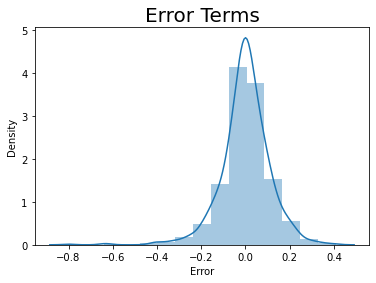

In [69]:
#Finding Resudual error
res = y_train - y_pred_train
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=20)
plt.xlabel("Error")

Residual Error Terms is Left skewed and it fails the assumptions of Linear Regression

Text(0, 0.5, 'y_pred_train')

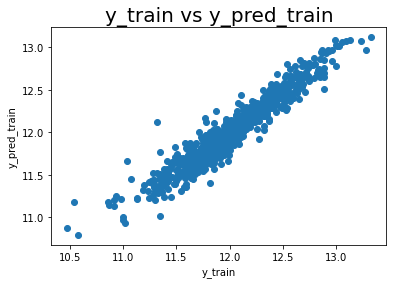

In [70]:
plt.scatter(y_train, y_pred_train)
plt.title('y_train vs y_pred_train',fontsize=20)
plt.xlabel('y_train')
plt.ylabel('y_pred_train')

# Checking for Homoscedasticity

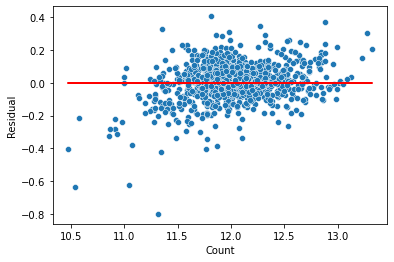

In [71]:
residual = y_train - y_pred_train
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no constant variance , so it is failing the Linear regression assumptions

In [72]:

# Test data will be only  transformed not fit_transform
df_test[sca] = scaler.transform(df_test[sca])

In [73]:
y_test = df_test.pop('LogSalePrice')
X_test = df_test

In [74]:
y_test.head()

1025    11.630709
843     11.856515
1397    11.831379
1189    12.149502
423     12.660328
Name: LogSalePrice, dtype: float64

In [75]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_old,YearRemodAdd_old,YrSold_old,GarageYrBlt_old,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1025,0.371212,0.233594,0.444444,0.500,0.000000,0.063071,0.118151,0.334979,0.213729,0.000000,0.173473,0.3,0.331655,0.130435,0.000000,0.275362,0.633333,0.75,0.362069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
843,0.446970,0.244543,0.444444,0.375,0.000000,0.000000,0.770548,0.683631,0.571763,0.000000,0.464071,0.8,0.000000,0.000000,0.000000,0.355072,0.816667,0.75,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0

In [76]:
X_test_rfe = X_test[col_rfe]

In [77]:
# adding a constant variable
X_test_new = sm.add_constant(X_test_rfe)

In [78]:
# predicting the value for the test dataset
y_test_pred = lm.predict(X_test_new)

# R2 values for Test and Train

In [79]:

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9204336588783505
0.8992113708159271
12.34909505397537
6.0606082956910985
0.012398689813228283
0.014160299756287614


Text(0.5, 0, 'Error')

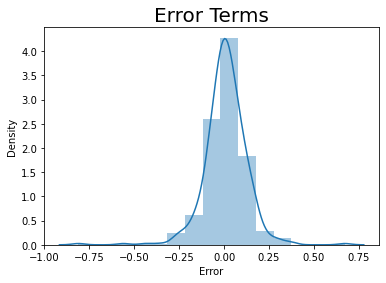

In [80]:
#Finding Resudual error
res = y_test - y_test_pred
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=20)
plt.xlabel("Error")

# Checking for Homoscedasticity

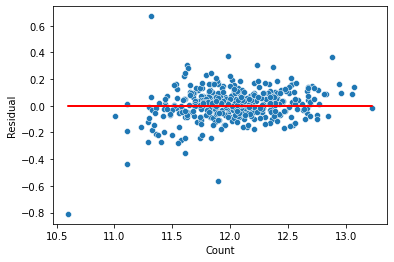

In [81]:
residual = y_test - y_test_pred
sns.scatterplot(y_test,residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Text(0, 0.5, 'y_test_pred')

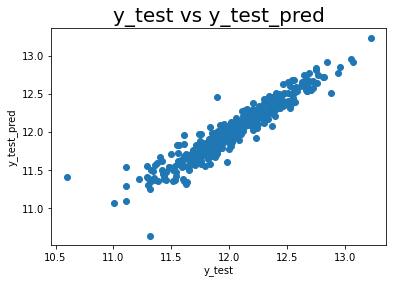

In [82]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Assumptions for Linear Regression  is failing, so we go for Ridge and Lasso Regression

# Ridge Regression

In [83]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 6.0,8.0, 9.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 6.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Best Alpha value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.8}
-0.08322468717698586


In [85]:
# display the mean scores and rank

ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
11,0.8,-0.078828,-0.083225,1
10,0.7,-0.078732,-0.083231,2
12,0.9,-0.078928,-0.083234,3
9,0.6,-0.078636,-0.083249,4
13,1.0,-0.079029,-0.083250,5
8,0.5,-0.078540,-0.083284,6
7,0.4,-0.078442,-0.083328,7
6,0.3,-0.078340,-0.083390,8
5,0.2,-0.078231,-0.083470,9
4,0.1,-0.078117,-0.083565,10


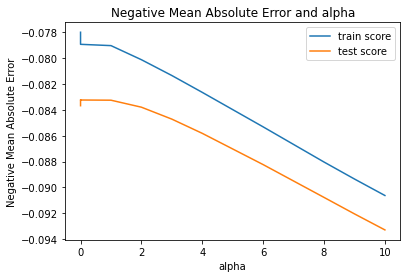

In [86]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

With Different Values of Alpha, finally we found the best alpha value for Ridge Regression is 0.8

In [87]:
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.14602843,  0.53733279,  0.38893741,  0.21698798,  0.30963577,
        0.7546275 ,  0.13638768,  0.08424202, -0.39915655, -0.12358257,
        0.07315267, -0.04679456, -0.11336439, -0.0135134 ,  0.24675723,
        0.13308779,  0.15490818,  0.10851972,  0.12644936,  0.08689754,
        0.14455093, -0.0135134 , -0.04679456, -0.06954886,  0.09082384,
        0.10307884,  0.        , -0.34858192,  0.10287276,  0.        ,
       -0.04804766, -0.07978097, -0.00131785, -0.00131785, -0.06828643,
        0.22162212, -0.11772156, -0.01294026,  0.00767831,  0.03949378,
       -0.03423182,  0.09363769,  0.09895828,  0.08977701, -0.07924695,
       -0.07924695, -0.06463194, -0.03468532,  0.04975441,  0.1288098 ])

In [88]:
# Assign the Features and their coefficient values to a dictionary 
ridge_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train_rfe.columns))
ridge_dict

{'LotArea': 0.146,
 'OverallQual': 0.5373,
 'OverallCond': 0.3889,
 'BsmtFinSF1': 0.217,
 'TotalBsmtSF': 0.3096,
 'GrLivArea': 0.7546,
 'TotRmsAbvGrd': 0.1364,
 'OpenPorchSF': 0.0842,
 'YearBuilt_old': -0.3992,
 'GarageYrBlt_old': -0.1236,
 'MSSubClass_75': 0.0732,
 'MSSubClass_90': -0.0468,
 'MSSubClass_160': -0.1134,
 'MSSubClass_190': -0.0135,
 'MSZoning_FV': 0.2468,
 'MSZoning_RH': 0.1331,
 'MSZoning_RL': 0.1549,
 'MSZoning_RM': 0.1085,
 'Neighborhood_Crawfor': 0.1264,
 'Neighborhood_NridgHt': 0.0869,
 'Neighborhood_StoneBr': 0.1446,
 'BldgType_2fmCon': -0.0135,
 'BldgType_Duplex': -0.0468,
 'HouseStyle_2.5Fin': -0.0695,
 'RoofStyle_Gambrel': 0.0908,
 'RoofStyle_Mansard': 0.1031,
 'Exterior1st_AsphShn': 0.0,
 'Exterior1st_BrkComm': -0.3486,
 'Exterior1st_BrkFace': 0.1029,
 'Exterior1st_CBlock': 0.0,
 'Exterior2nd_Other': -0.048,
 'Foundation_Wood': -0.0798,
 'BsmtQual_No Basement': -0.0013,
 'BsmtFinType1_No Basement': -0.0013,
 'HeatingQC_Po': -0.0683,
 'BsmtFullBath_3': 0.2216,
 

In [89]:
# Method to get the coefficient values in sorted manner

def get(a):
    return ridge_dict[a]

# Assign top 10 features to a temp dataframe for further display in the bar plot

te_df1 = pd.DataFrame(list(zip( X_train_rfe.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
te_df1 = te_df1.loc[te_df1['rfe_support'] == True]
te_df1.reset_index(drop=True, inplace=True)

te_df1['Coefficient'] = te_df1['Features'].apply(get)
te_df1 = te_df1.sort_values(by=['Coefficient'], ascending=False)
te_df1 = te_df1.head(10)
te_df1

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,0.7546
0,OverallQual,True,1,0.5373
1,OverallCond,True,1,0.3889
7,MSZoning_FV,True,1,0.2468
16,BsmtFullBath_3,True,1,0.2216
2,BsmtFinSF1,True,1,0.2170
8,MSZoning_RH,True,1,0.1331
18,GarageCars_4,True,1,0.1288
9,Neighborhood_Crawfor,True,1,0.1264
10,RoofStyle_Mansard,True,1,0.1031


In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9188847228558401
0.9026000300957013
12.589497690377382
5.8568418915984015
0.012640057922065644
0.013684210027099068


We Found the R2 value of Ridge regression for train is 91.8% ans Test is 90.2%. 

# Lasso Regression

In [91]:
# List of Alpha values to tune
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01,0.02,0.03,0.04]}

folds= 10
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.070620,-0.081970,1
3,0.0004,-0.071678,-0.082071,2
4,0.0005,-0.072787,-0.082241,3
1,0.0002,-0.069386,-0.082478,4
0,0.0001,-0.068015,-0.083825,5
5,0.001,-0.077250,-0.084401,6
6,0.002,-0.083455,-0.088993,7
7,0.003,-0.089334,-0.094014,8
8,0.004,-0.094263,-0.098364,9
9,0.005,-0.098969,-0.102792,10


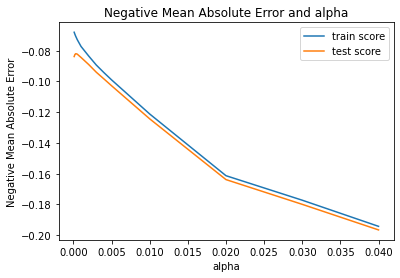

In [93]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Alpha increases, the Negative mean Absolute Error is decreases

In [94]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0003}


We found Best value of alpha for Lasso Regression is 0.0003

In [95]:
#Fitting Lasso model for alpha = 0.0003 and printing coefficients which have been penalised

alpha =0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 8.84256176e-03,  1.02770299e-01,  4.18675228e-01,  3.15619330e-01,
        3.53788299e-02,  1.57505488e-01, -0.00000000e+00,  3.41697919e-01,
        5.14306716e-03,  0.00000000e+00,  6.85696769e-01,  4.55296985e-02,
        8.19001037e-02,  5.99951523e-02,  5.47316627e-02, -2.68496573e-01,
       -5.33038141e-02,  1.55538415e-02, -0.00000000e+00, -4.50983228e-02,
        0.00000000e+00, -0.00000000e+00,  2.15134228e-02, -0.00000000e+00,
        5.09592182e-02,  4.12272713e-03,  0.00000000e+00,  1.10262522e-03,
       -4.46835749e-03, -4.16525945e-04, -8.87995147e-02, -0.00000000e+00,
       -0.00000000e+00,  5.78398714e-02,  2.53260685e-03,  4.94871970e-02,
       -0.00000000e+00,  9.02101736e-03, -0.00000000e+00,  4.39193092e-03,
        1.94831742e-02, -2.86778595e-02, -0.00000000e+00, -1.63339726e-02,
        0.00000000e+00, -0.00000000e+00,  1.54250860e-02,  0.00000000e+00,
        2.74316126e-03,  9.92064716e-02, -2.60961125e-02, -0.00000000e+00,
       -3.68921802e-02, -

In [96]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.934936170478616
0.906697921866678
10.098232544170582
5.610428014724782
0.010138787694950383
0.013108476669917714


We Found the R2 value of Lasso Regression for train is 93.5% ans Test is 90.6% which is higher then Ridge regression.

In [97]:
# Put the Features and Coefficients in dictionary

lasso_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_dict

{'LotFrontage': 0.008842561762250425,
 'LotArea': 0.10277029910190129,
 'OverallQual': 0.4186752282573052,
 'OverallCond': 0.3156193298501786,
 'MasVnrArea': 0.03537882989500071,
 'BsmtFinSF1': 0.15750548821237015,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.34169791889847273,
 '1stFlrSF': 0.005143067164458225,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.6856967687137782,
 'TotRmsAbvGrd': 0.04552969845187456,
 'GarageArea': 0.08190010373406392,
 'WoodDeckSF': 0.05999515229248025,
 'OpenPorchSF': 0.05473166269073431,
 'YearBuilt_old': -0.26849657297966256,
 'YearRemodAdd_old': -0.053303814131938895,
 'YrSold_old': 0.015553841545149319,
 'GarageYrBlt_old': -0.0,
 'MSSubClass_30': -0.04509832284802912,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': -0.0,
 'MSSubClass_50': 0.021513422810072645,
 'MSSubClass_60': -0.0,
 'MSSubClass_70': 0.050959218225407915,
 'MSSubClass_75': 0.004122727128816837,
 'MSSubClass_80': 0.0,
 'MSSubClass_85': 0.0011026252209575616,
 'MSSubClass_90': -0.004468357487174016,
 'MSSubClas

In [98]:
# Method to get the coefficient values

def get(a):
    return lasso_dict[a]

# Assign top 10 features to a temp dataframe for further display in the bar plot

te_df2 = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
te_df2 = te_df2.loc[te_df2['rfe_support'] == True]
te_df2.reset_index(drop=True, inplace=True)

te_df2['Coefficient'] = te_df2['Features'].apply(get)
te_df2 = te_df2.sort_values(by=['Coefficient'], ascending=False)
te_df2= te_df2.head(10)
te_df2



,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.685697
1,OverallQual,True,1,0.418675
4,TotalBsmtSF,True,1,0.341698
2,OverallCond,True,1,0.315619
3,BsmtFinSF1,True,1,0.157505
28,Exterior1st_BrkFace,True,1,0.102977
0,LotArea,True,1,0.102770
18,Neighborhood_Crawfor,True,1,0.099206
20,Neighborhood_StoneBr,True,1,0.096606
41,GarageType_Attchd,True,1,0.077496


In [99]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.920434,0.918885,0.934936
1,R2 Score (Test),0.899211,0.902600,0.906698
2,RSS (Train),12.349095,12.589498,10.098233
3,RSS (Test),6.060608,5.856842,5.610428
4,MSE (Train),0.111349,0.112428,0.100692
5,MSE (Test),0.118997,0.116980,0.114492


# Assignment Part-2 Questions

# Doubling the Alpha values

In [100]:
alpha = 1.6
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train_rfe, y_train)
ridge1.coef_

array([ 0.14599026,  0.53163575,  0.37248295,  0.21698484,  0.30314012,
        0.68299806,  0.17147314,  0.09055378, -0.37844388, -0.12739661,
        0.06079755, -0.04398477, -0.10540055, -0.01475024,  0.20923073,
        0.09068241,  0.11843771,  0.07099591,  0.12652418,  0.08754382,
        0.14142898, -0.01475024, -0.04398477, -0.04993378,  0.0725452 ,
        0.09475448,  0.        , -0.24109711,  0.10180228,  0.        ,
       -0.03154556, -0.05884692, -0.00473759, -0.00473759, -0.04982087,
        0.15502145, -0.10952314, -0.01095385,  0.01182723,  0.03630406,
       -0.03717744,  0.09459571,  0.10314238,  0.08530893, -0.0809758 ,
       -0.0809758 , -0.06434175, -0.02862724,  0.06153701,  0.11240777])

In [101]:
ridge_dict1 = dict(pd.Series(ridge1.coef_.round(4), index = X_train_rfe.columns))
ridge_dict1

{'LotArea': 0.146,
 'OverallQual': 0.5316,
 'OverallCond': 0.3725,
 'BsmtFinSF1': 0.217,
 'TotalBsmtSF': 0.3031,
 'GrLivArea': 0.683,
 'TotRmsAbvGrd': 0.1715,
 'OpenPorchSF': 0.0906,
 'YearBuilt_old': -0.3784,
 'GarageYrBlt_old': -0.1274,
 'MSSubClass_75': 0.0608,
 'MSSubClass_90': -0.044,
 'MSSubClass_160': -0.1054,
 'MSSubClass_190': -0.0148,
 'MSZoning_FV': 0.2092,
 'MSZoning_RH': 0.0907,
 'MSZoning_RL': 0.1184,
 'MSZoning_RM': 0.071,
 'Neighborhood_Crawfor': 0.1265,
 'Neighborhood_NridgHt': 0.0875,
 'Neighborhood_StoneBr': 0.1414,
 'BldgType_2fmCon': -0.0148,
 'BldgType_Duplex': -0.044,
 'HouseStyle_2.5Fin': -0.0499,
 'RoofStyle_Gambrel': 0.0725,
 'RoofStyle_Mansard': 0.0948,
 'Exterior1st_AsphShn': 0.0,
 'Exterior1st_BrkComm': -0.2411,
 'Exterior1st_BrkFace': 0.1018,
 'Exterior1st_CBlock': 0.0,
 'Exterior2nd_Other': -0.0315,
 'Foundation_Wood': -0.0588,
 'BsmtQual_No Basement': -0.0047,
 'BsmtFinType1_No Basement': -0.0047,
 'HeatingQC_Po': -0.0498,
 'BsmtFullBath_3': 0.155,
 'Bed

In [102]:
# Method to get the coefficient values

def get(a):
    return ridge_dict1[a]

# Assign top 10 features to a temp dataframe for further display in the bar plot

te_df1 = pd.DataFrame(list(zip( X_train_rfe.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
te_df1 = te_df1.loc[te_df1['rfe_support'] == True]
te_df1.reset_index(drop=True, inplace=True)

te_df1['Coefficient'] = te_df1['Features'].apply(get)
te_df1 = te_df1.sort_values(by=['Coefficient'], ascending=False)
te_df1 = te_df1.head(10)
te_df1

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,0.6830
0,OverallQual,True,1,0.5316
1,OverallCond,True,1,0.3725
2,BsmtFinSF1,True,1,0.2170
7,MSZoning_FV,True,1,0.2092
16,BsmtFullBath_3,True,1,0.1550
9,Neighborhood_Crawfor,True,1,0.1265
18,GarageCars_4,True,1,0.1124
11,Exterior1st_BrkFace,True,1,0.1018
10,RoofStyle_Mansard,True,1,0.0948


In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge1.predict(X_train_rfe)
y_pred_test = ridge1.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9167795848183178
0.902145982430403
12.916225668070325
5.884144624746208
0.01296809806031157
0.013748001459687402


In [104]:
#Fitting Lasso model for alpha = 0.0006 and printing coefficients which have been penalised

alpha =0.0006

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train) 
lasso1.coef_

array([ 0.00000000e+00,  9.48396014e-02,  4.70829899e-01,  3.02526211e-01,
        2.95238913e-02,  1.61862099e-01, -0.00000000e+00,  3.57915756e-01,
        0.00000000e+00,  0.00000000e+00,  6.83673069e-01,  3.31141368e-02,
        7.63317983e-02,  5.02325360e-02,  4.22143753e-02, -2.26153718e-01,
       -6.21658514e-02,  1.16240995e-02, -0.00000000e+00, -4.60508399e-02,
        0.00000000e+00, -0.00000000e+00,  1.54174274e-02, -0.00000000e+00,
        2.58132899e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.98471730e-02, -0.00000000e+00,
       -0.00000000e+00,  4.88340792e-02,  0.00000000e+00,  5.46383834e-02,
       -0.00000000e+00,  4.10284855e-04, -0.00000000e+00,  0.00000000e+00,
        1.49661864e-02, -1.47220033e-02, -0.00000000e+00, -1.54644991e-02,
        0.00000000e+00,  0.00000000e+00,  1.21394558e-02,  0.00000000e+00,
        3.95217894e-03,  9.61354233e-02, -1.66954208e-02, -0.00000000e+00,
       -1.54368181e-02, -

In [105]:
# Put the Features and Coefficients in dictionary

lasso_dict1 = dict(pd.Series(lasso1.coef_, index = X_train.columns))
lasso_dict1

{'LotFrontage': 0.0,
 'LotArea': 0.09483960136660116,
 'OverallQual': 0.47082989890925486,
 'OverallCond': 0.3025262112594242,
 'MasVnrArea': 0.02952389128766978,
 'BsmtFinSF1': 0.16186209883848487,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.35791575635211675,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.6836730694485267,
 'TotRmsAbvGrd': 0.0331141367612015,
 'GarageArea': 0.07633179825685715,
 'WoodDeckSF': 0.050232536042535206,
 'OpenPorchSF': 0.04221437534067666,
 'YearBuilt_old': -0.226153717648543,
 'YearRemodAdd_old': -0.062165851412442574,
 'YrSold_old': 0.011624099526931412,
 'GarageYrBlt_old': -0.0,
 'MSSubClass_30': -0.04605083992254292,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': -0.0,
 'MSSubClass_50': 0.01541742741396786,
 'MSSubClass_60': -0.0,
 'MSSubClass_70': 0.025813289918512967,
 'MSSubClass_75': 0.0,
 'MSSubClass_80': 0.0,
 'MSSubClass_85': 0.0,
 'MSSubClass_90': -0.0,
 'MSSubClass_120': -0.0,
 'MSSubClass_160': -0.07984717300224983,
 'MSSubClass_180': -0.0,
 'MSSubC

In [106]:
# Method to get the coefficient values

def get(a):
    return lasso_dict1[a]

# Assign top 10 features to a temp dataframe for further display in the bar plot

te_df2 = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
te_df2 = te_df2.loc[te_df2['rfe_support'] == True]
te_df2.reset_index(drop=True, inplace=True)

te_df2['Coefficient'] = te_df2['Features'].apply(get)
te_df2 = te_df2.sort_values(by=['Coefficient'], ascending=False)
te_df2= te_df2.head(10)
te_df2

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.683673
1,OverallQual,True,1,0.470830
4,TotalBsmtSF,True,1,0.357916
2,OverallCond,True,1,0.302526
3,BsmtFinSF1,True,1,0.161862
18,Neighborhood_Crawfor,True,1,0.096135
0,LotArea,True,1,0.094840
28,Exterior1st_BrkFace,True,1,0.091449
20,Neighborhood_StoneBr,True,1,0.075460
16,MSZoning_RL,True,1,0.054638


In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9286087496091197
0.9103491320414523
11.080279986121607
5.390873935522703
0.011124779102531733
0.012595499849352109


# Removing Top 5 Features

In [108]:
# Checking all Neighborhood dummy variables
to_drop = X_train.columns.drop(['GrLivArea','OverallQual','OverallCond','TotalBsmtSF','BsmtFinSF1'])


In [109]:
# Droping above features from X_train and X_test
X_train_drop= X_train[to_drop]
X_test_drop= X_test[to_drop]


In [110]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01,0.02,0.03,0.04]}

folds= 10
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_drop, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0004}


In [112]:
# Building Lasso model with these features
lasso_drop= Lasso(alpha= .0004)
lasso_drop.fit(X_train_drop, y_train)
lasso_drop.coef_

array([ 0.00000000e+00,  7.10651316e-02,  4.34640313e-02, -1.45667394e-02,
        8.18144436e-01,  3.71098505e-01,  1.15518345e-02,  1.69599302e-01,
        7.03377935e-02,  8.17812766e-02, -2.06142629e-01, -1.06043477e-01,
        8.94000014e-03,  0.00000000e+00, -8.09400564e-02,  0.00000000e+00,
       -0.00000000e+00,  3.88862164e-02,  0.00000000e+00,  6.77090064e-02,
        4.14220345e-02, -0.00000000e+00,  0.00000000e+00, -1.16814418e-07,
       -0.00000000e+00, -7.48898073e-02, -0.00000000e+00, -0.00000000e+00,
        3.62062429e-02, -0.00000000e+00,  4.46023788e-02,  1.04081154e-02,
        3.85854878e-03, -0.00000000e+00,  3.13020340e-03,  2.17192199e-02,
       -3.10219888e-02, -0.00000000e+00, -2.00090883e-02, -0.00000000e+00,
        0.00000000e+00,  6.26846496e-03,  0.00000000e+00, -0.00000000e+00,
        1.34180157e-01, -5.80275081e-02, -2.11627917e-03, -6.13614951e-02,
       -1.10354521e-01, -2.83153215e-02, -1.05929321e-02,  0.00000000e+00,
       -0.00000000e+00,  

In [113]:
# Put the Features and Coefficients in dictionary

lasso_dict_drop = dict(pd.Series(lasso_drop.coef_, index = X_train_drop.columns))
lasso_dict_drop

{'LotFrontage': 0.0,
 'LotArea': 0.07106513163316787,
 'MasVnrArea': 0.043464031285908394,
 'BsmtUnfSF': -0.014566739387671349,
 '1stFlrSF': 0.8181444361545144,
 '2ndFlrSF': 0.37109850484566825,
 'TotRmsAbvGrd': 0.01155183454442231,
 'GarageArea': 0.169599302199211,
 'WoodDeckSF': 0.07033779352978108,
 'OpenPorchSF': 0.08178127657667031,
 'YearBuilt_old': -0.2061426285656897,
 'YearRemodAdd_old': -0.10604347704614504,
 'YrSold_old': 0.00894000014239142,
 'GarageYrBlt_old': 0.0,
 'MSSubClass_30': -0.08094005641112777,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': -0.0,
 'MSSubClass_50': 0.038886216447521896,
 'MSSubClass_60': 0.0,
 'MSSubClass_70': 0.06770900638721068,
 'MSSubClass_75': 0.04142203447940512,
 'MSSubClass_80': -0.0,
 'MSSubClass_85': 0.0,
 'MSSubClass_90': -1.1681441781362759e-07,
 'MSSubClass_120': -0.0,
 'MSSubClass_160': -0.0748898072535165,
 'MSSubClass_180': -0.0,
 'MSSubClass_190': -0.0,
 'MSZoning_FV': 0.0362062428936328,
 'MSZoning_RH': -0.0,
 'MSZoning_RL': 0.04460237

In [114]:
# Method to get the coefficient values

def get(a):
    return lasso_dict_drop[a]

# Assign top 10 features to a temp dataframe for further display in the bar plot

te_df2 = pd.DataFrame(list(zip( X_train_drop.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
te_df2 = te_df2.loc[te_df2['rfe_support'] == True]
te_df2.reset_index(drop=True, inplace=True)

te_df2['Coefficient'] = te_df2['Features'].apply(get)
te_df2 = te_df2.sort_values(by=['Coefficient'], ascending=False)
te_df2= te_df2.head(10)
te_df2

,Features,rfe_support,rfe_ranking,Coefficient
3,2ndFlrSF,True,1,0.371099
4,GarageArea,True,1,0.169599
40,GarageType_BuiltIn,True,1,0.098220
31,BsmtExposure_Gd,True,1,0.072957
0,LotArea,True,1,0.071065
19,Neighborhood_Somerst,True,1,0.054093
12,MSZoning_RL,True,1,0.044602
1,MasVnrArea,True,1,0.043464
30,Exterior2nd_Wd Sdng,True,1,0.039491
45,GarageCars_3,True,1,0.037321


# Conclusion

1. The optimal value -

    Ridge - 0.8
    Lasso - 0.0003


2. MSE value - 

    Ridge - 0.1169
    Lasso - 0.1144
    
    Mean Square value of Lasso is slightly lesser than Ridge
    
    
3. Top predictor variables for predicting house price is

                GrLivArea
                OverallQual
                TotalBsmtSF
                OverallCond
                BsmtFinSF1
                Exterior1st_BrkFace
                LotArea
                Neighborhood_Crawfor
                Neighborhood_StoneBr
                GarageType_Attchd
                
4. Lasso is automatic feature selection and R2 value is higher compared to Ridge and it is best regression model compared to Ridge.